In [57]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
#  
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [58]:
def getPage(page=0):
    '''Метод для получения страницы со списком вакансий (по умолчанию страница - 0, т.е. первая)'''
    params = {
        'employer_id': '3529',
        'area': 1,
        'page': page,
        'per_page': 100
    }
    
    res = requests.get('https://api.hh.ru/vacancies', params)
    vacancies = res.json()
    res.close()
    return vacancies

In [59]:
def makeDataFrame(page=0):
    '''Метод создает pandas.DataFrame по данным из hh.ru.'''
    for page in range(0, getPage(page)['pages'] + 1):
        if page == 0:
            vacancies_df = pd.DataFrame(getPage(page)['items'])
        else:
            vacancies_df = vacancies_df.append(pd.DataFrame(getPage(page)['items']), ignore_index=True)
    return vacancies_df

In [60]:
def addSkillsColumn(dataframe, page=0):
    '''Добавляет колонку Skills в DataFrame, копируя данные по навыкам из словоря в колонке Snippent по ключу Requirement.'''
    skills_dict = {}
    for page in range(0, getPage(page)['pages'] + 1):
        for df_item in getPage(page)['items']:
            for key, value in df_item['snippet'].items():
                if key == 'requirement':
                    skills_dict[df_item['id']] = value
    return dataframe['id'].map(skills_dict)

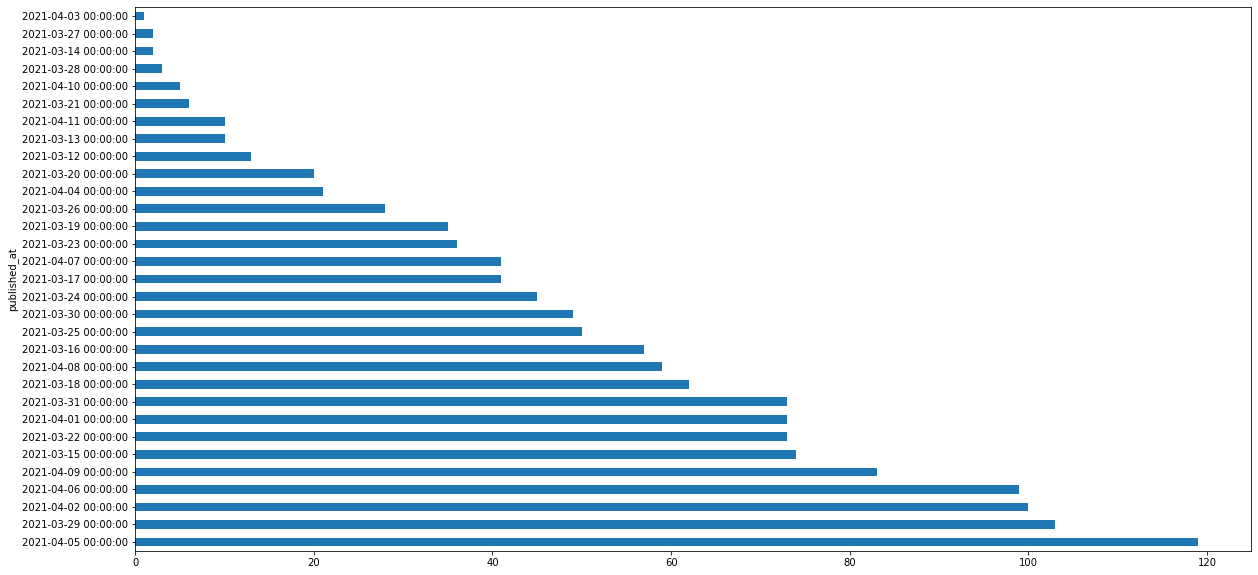

In [100]:
vacancies_df = makeDataFrame() # Сздаем DataFrame
vacancies_df['skills'] = addSkillsColumn(vacancies_df) # Добавляем новую колонку Skills
vacancies_df['published_at'] = pd.to_datetime(vacancies_df['published_at'].str[:10], format='%Y-%m-%d') # Меняем формат поля Дата публикации к виду ГГГГ-ММ-ДД
# vacancies_df['published_at']
vacancies_df.groupby('published_at')['id'].count().sort_values(ascending=False).plot(kind='barh', figsize=(20, 10)) # График по датам публикации

In [64]:
vacancies_df['published_day_name'] = vacancies_df['published_at'].dt.day_name() # Переводим даты публикации в название дней недели в новую колонку
vacancies_df.groupby('published_day_name')['id'].count().sort_values(ascending=False).nlargest(1) # Больше всего публикуют вакансии в этот день недели

published_day_name
Monday    369
Name: id, dtype: int64

In [89]:
condition_1 = vacancies_df.name.str.contains('analyst|аналитик данных|data|junior', na=False)
condition_2 = vacancies_df.skills.str.contains('python', na=False)
myvacs = vacancies_df[condition_1 | condition_2].reset_index() # Интренсные вакансии с Python

In [91]:
myvacs['skills']

0     Знание и опыт работы с ETL, включая развертыва...
1     Высшее образование (Математика, Информационные...
2     Опыт работы от 1 года в схожих сферах. Знание ...
3     Знание архитектуры МРР-СУБД Greenplum, Teradat...
4     Высшее техническое образование (Математика, Ин...
5     Понимание основ математической статистики. Вла...
6     Опыт руководства группой 5-10 сотрудников от 2...
7     Опыт разработки на python. Понимание принципов...
8     Основное - желание развиваться, стрессоустойчи...
9     Образование высшее техническое. Опыт работы св...
10    Опыт работы с данными. Уверенное владение Pyth...
11    Выбираем оптимальные методы моделирования. Кач...
12    Уверенное знание операционных систем Windows и...
13    Высшее образование по направлению: прикладная ...
14    Образование высшее техническое. Опыт работы св...
15    высшее образование по направлению: прикладная ...
16    Высшее образование в области экономики/математ...
17    Уверенное знание операционных систем Windo

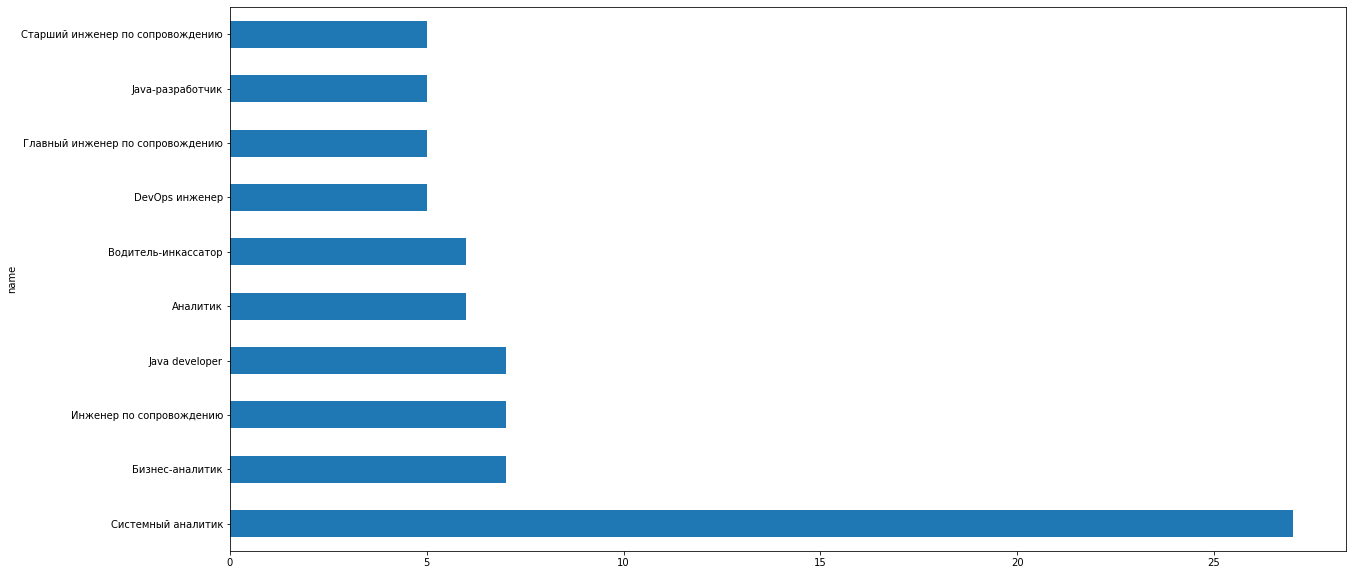

In [99]:
vacancies_df.groupby('name')['id'].count().sort_values(ascending=False).nlargest(10).plot(kind='barh', figsize=(20, 10))# Наиболее востребованныу вакансии

In [63]:
vacancies_df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,skills,published_day_name
0,32698117,False,Разработчик Java,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Варшавское шоссе...",...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Экспертный уровень core Java ...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,Экспертный уровень core Java (collections/mult...,Friday
1,33464069,False,Администратор IT систем / SRE (команда SberDev...,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Уверенные знания Linux. Опыт ...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,Уверенные знания Linux. Опыт внедрения и сопро...,Sunday
2,36730688,False,IOS developer (Sber ID),"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Знание языка Objective-C (зна...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,Знание языка Objective-C (знание Swift приветс...,Tuesday
3,36737287,False,IOS developer (Зарплатный проект),"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Использовать современные подх...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"Использовать современные подходы, инструменты ...",Tuesday
4,37735943,False,Аналитик/разработчик DWH,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Высшее техническое или физико...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,Высшее техническое или физико-математическое о...,Friday
